In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('total-precipitation-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

year  solar_radiation  mean_air_temperature  mean_wind_speed  \
0  Jan-10              8.1                  -3.4              5.5   
1  Feb-10              9.1                  -4.9              4.1   
2  Mar-10             12.2                  -1.4              4.7   
3  Apr-10             14.5                   3.5              4.3   
4  May-10             19.2                   7.3              4.9   

   mean_relative_humidity  percentage_possible_sunshine  \
0                      75                            14   
1                      74                            17   
2                      68                            29   
3                      77                            36   
4                      86                            37   

   total_sunshine_duration  total_precipitation  
0                     40.4                 75.5  
1                     48.8                109.5  
2                    108.0                100.5  
3                    146.2                 94.0  
4                    168.6                 76.5

In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.29387047352253315


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[ 95.85780336  81.53283311  59.95591377  60.03207724  60.90321852
  69.90704805 165.87159167 132.83527367 112.71540086 111.84430186
 129.32244423 107.71713377  84.16288468  89.68123882  44.9329957
  75.67143284  71.99809377 111.74431159 120.63593547 124.17652391
 132.54201444 122.4114029  123.78876184 101.54709539  83.17067007
  68.9633975   48.44110435  35.77616853  80.72535459  48.69311612
 129.45831951 132.61482464 156.51108644 129.43191027 136.48196886
 100.91322232  85.94082934  83.05408977  69.53499947  58.20235216
  91.39665386  74.25585158  78.9520964  157.04519091 132.5730532
 121.68590988 128.20449953 112.85009977  80.77065859  82.3263546
  29.83288529  32.60763766  83.06656361  80.06103391 111.45237689
 113.050651   127.50275825 115.52270343 117.60967048 103.46213274
  93.10910328  98.72374019  81.38477703  57.54692627  59.43808437
 104.75263719 128.91057532 134.41384947 120.81291229 124.95881991
 118.99613307 101.74581938  82.90707727  82.10639227  53.6

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 36.31724399499102
Mean Squared Error: 2342.8018266591953
Root Mean Squared Error: 48.40249814481888


Text(0.5, 1.0, 'Total precipitation - actual and predicted values')

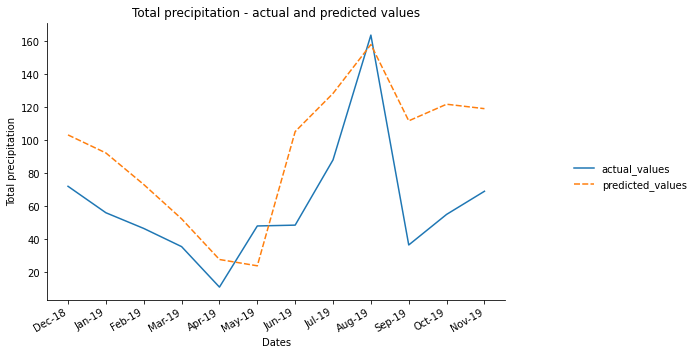

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Total precipitation') #set the label for the y-axis
plt.title('Total precipitation - actual and predicted values') #set the title of the graph